In [4]:
%run "libraries.ipynb"
import networkx as nx
from IPython.html import widgets
from IPython.display import display, HTML

# importing datasets

In [17]:
# list of page names
pages = codecs.open("data/pagenames.txt","r", "utf-8-sig").readlines()
pages = map(lambda x: x.strip(), pages)

# page graph obtained by projecting page-editor bi-partite graph
pages_graph = nx.read_gexf("data/pages-linked-by-coeditors.gexf")

# page graph obtained by projecting page-editor bi-partite graph
pages_editors_graph = nx.read_gexf("data/pages-editors.gexf")

In [80]:
def table_to_html(data, cols=[]):
    html = "<table>"
    html += "<tr>"
    for column_content in cols:
        html += "<th>%s</th>" % (column_content)
    html += "</tr>"
    
    for d in data:
        html += "<tr>"
        for column_content in d:
            html += "<td>%s</td>" % (column_content)
        html += "</tr>"
    html += "</table>"
        
    return HTML(html) 

def show_info(page):
    display(HTML("<h2>%s</h2>" % (page)))
    
    #display(HTML("<div style=\"float:left\">"))    
    display(HTML("<h3>co-edited pages</h3>"))

    nb = sorted(pages_graph["p:%s" % (page)].items(),
            key=lambda (k,x): -int(x["coeditors"]))

    data = []

    # calculate rank in neighbor top co-edited ranking
    for name, info in nb:
        nb_mirror = sorted(pages_graph[name].items(),
                key=lambda (k,x): -int(x["coeditors"]))
        nb_mirror = [ x[0] for x in nb_mirror ]
        
        editors = pages_editors_graph[name]        
        info["editors"] = len(editors)
        info["exclusive editors"] = len([n for n in editors if len(pages_editors_graph[n]) == 1 ])

        info["ranking"] = nb_mirror.index("p:%s" % (page)) + 1

    #print nb

    for name, info in nb[0:10]:
        data.append([ "<a href=\"http://en.wikipedia.org/wiki/{0}\" target=\"_blank\">{0}</a>".format(name.split(":")[1]),
                     info["editors"],
                     info["coeditors"],
                     float(info["coeditors"]) / float(info["editors"]),
                     info["exclusive editors"],
                     info["ranking"]])

    display(table_to_html(data, ["page name", "editors", "co-editors", "co-editors/editors", "exclusive editors" ,"ranking"]))
    #display(HTML("</div>"))    

    #display(HTML("<div style=\"float:left\">"))    
    display(HTML("<h3>ranked first in</h3>"))

    nb_list = [ x[0] for x in nb ]
    data = []

    nb2 = sorted(nb, key=lambda (x): x[1]["ranking"])
    for name, info in nb2[0:10]:
        editors = pages_editors_graph[name]        
        info["editors"] = len(editors)
        info["exclusive editors"] = len([n for n in editors if len(pages_editors_graph[n]) == 1 ])

        data.append([ "<a href=\"http://en.wikipedia.org/wiki/{0}\" target=\"_blank\">{0}</a>".format(name.split(":")[1]),
                     info["editors"],
                     info["coeditors"],
                     float(info["coeditors"]) / float(info["editors"]),
                     info["exclusive editors"],
                     info["ranking"]])  

    display(table_to_html(data, ["page name", "editors", "co-editors", "co-editors/editors", "exclusive editors" ,"ranking"]))
#     display(HTML("</div>"))    
#     display(HTML("<div style=\"clear:both\"></div>"))
    
    display(HTML("<h3>pageviews and revisions</h3>"))

    pageviews = pd.DataFrame.from_csv("data/pageviews/%s.weekly.csv" % (page))
    pageviews.plot(figsize=(16,4), linewidth="0.5", ylim=0, colormap="Spectral", rot=0)
    plt.plot()
    
    display(HTML("<h3>top editors</h3>"))
    
    revisions = json.load(codecs.open("data/revisions/%s.json" % (page), "r", "utf-8-sig"))
    revisions = pd.DataFrame(revisions)

    top_editors = revisions.groupby("user").groups
    top_editors = sorted(top_editors.items(), key=lambda x: -len(x[1]))
    # top_editors = top_editors.rename(columns = { 1 :'edits'})

    data = []

    for name, edits in top_editors[0:10]:
        data.append(["<a href=\"http://en.wikipedia.org/wiki/User:{0}\" target=\"_blank\">{0}</a>".format(name),
                     len(edits)])

    display(table_to_html(data, ["editor name", "edits"]))

# show_info("Pi")

# explorer

page name,editors,co-editors,co-editors/editors,exclusive editors,ranking
Mathematics,1509,266,0.176275679258,676,2
Pi,1799,208,0.115619788772,886,3
Triangle,916,185,0.201965065502,295,2
Pythagorean theorem,947,172,0.181626187962,330,4
Trigonometry,854,169,0.197892271663,323,3
Geometry,599,154,0.257095158598,180,3
Circle,807,147,0.182156133829,253,4
Crystal,622,137,0.220257234727,229,2
Fractal,760,132,0.173684210526,321,3
Angle,469,117,0.249466950959,132,3


page name,editors,co-editors,co-editors/editors,exclusive editors,ranking
Handedness,428,71,0.165887850467,216,1
3D computer graphics,240,55,0.229166666667,90,1
Epipolar geometry,38,11,0.289473684211,15,1
Mathematics,1509,266,0.176275679258,676,2
Triangle,916,185,0.201965065502,295,2
Crystal,622,137,0.220257234727,229,2
Pattern,252,59,0.234126984127,92,2
Prism (geometry),145,52,0.358620689655,25,2
Computer graphics,241,49,0.203319502075,95,2
Quasicrystal,200,40,0.2,74,2


editor name,edits
RJHall,134
Vsmith,99
Materialscientist,84
ClueBot NG,77
ClueBot,48
Lir,44
Ruslik0,44
Old Moonraker,39
Dr. Submillimeter,37
Ckatz,30


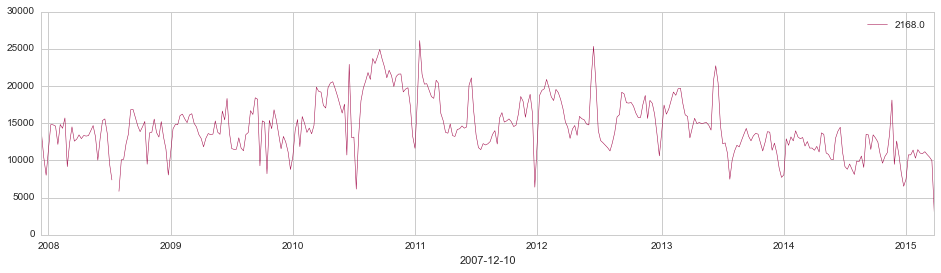

In [81]:
w = widgets.SelectWidget(description="page", options=pages)
widgets.interact(show_info, page=w);